In [34]:
#Dependencies 
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras import utils as np_utils
from keras.layers import Dense
from keras.callbacks import EarlyStopping

# Clean and Preprocess Data for Machine Learning
import numpy as np
import pandas as pd

#Graphing dependencies 
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot as skplt
import seaborn as sns
import statsmodels.api as sm

In [35]:
#Import and create DataFrames
race_stats = pd.read_csv('Stats_Races.csv')
horse_stats = pd.read_csv('Stats_Horses.csv')

In [36]:
race_stats_df = pd.DataFrame(race_stats) 
horse_stats_df = pd.DataFrame(horse_stats) 

In [37]:
# Merge CSV's to create one dataframe 
#merge_df = pd.merge(race_stats_df, horse_stats_df, how='left', left_on=['id'], right_on = ['id'])
merge_df = pd.merge(race_stats_df, horse_stats_df, on=['id'])
merge_df.head()

,id,collected_at,market_id,position,place_paid,margin,horse_id,trainer_id,rider_id,handicap_weight,...,tip_seven_place,tip_eight_win,tip_eight_place,tip_nine_win,tip_nine_place,age,sex_id,sire_id,dam_id,prize_money
0,13,2016-06-27 02:54:32.082518,1,NaN,0,NaN,13,12.0,13.0,56.5,...,t,t,t,f,t,6.0,3.0,13.0,13.0,16885.0
1,8,2016-06-27 02:54:31.91754,1,NaN,0,NaN,8,8.0,8.0,56.5,...,f,f,f,f,f,6.0,3.0,8.0,8.0,19290.0
2,14,2016-06-27 02:54:32.121807,1,NaN,0,NaN,14,13.0,14.0,56.5,...,f,f,f,f,f,3.0,2.0,14.0,14.0,575.0
3,7,2016-06-27 02:54:31.894908,1,NaN,0,NaN,7,7.0,7.0,56.5,...,t,f,t,f,t,3.0,2.0,7.0,7.0,1215.0
4,3,2016-06-27 02:54:31.781492,1,NaN,0,NaN,3,3.0,3.0,58.5,...,f,f,f,f,f,4.0,1.0,3.0,3.0,1175.0


In [38]:
#create new dataframe with only the desired columns and drop na  
new_df = merge_df[['position', 'age', 'sex_id', 'prize_money', 'trainer_id', 'rider_id', 'sire_id', 'dam_id', 'handicap_weight']].dropna()
new_df.head()

,position,age,sex_id,prize_money,trainer_id,rider_id,sire_id,dam_id,handicap_weight
195,1.0,4.0,3.0,8885.0,177.0,105.0,233.0,439.0,57.0
196,2.0,4.0,3.0,13850.0,146.0,87.0,18.0,436.0,60.5
197,3.0,6.0,1.0,28560.0,251.0,101.0,147.0,441.0,55.5
198,4.0,4.0,3.0,550.0,177.0,90.0,3.0,440.0,56.0
199,5.0,3.0,2.0,1700.0,148.0,110.0,92.0,437.0,59.0


In [39]:
#ax = sns.catplot(x='prize_money',kind='count',data=new_df,orient="h")
#ax.fig.autofmt_xdate()

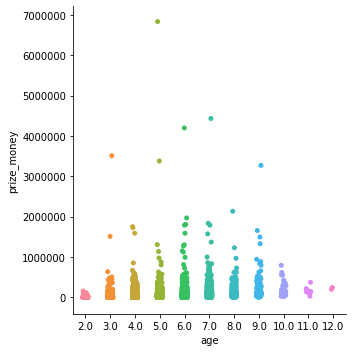

In [40]:
sns.catplot(x="age",y="prize_money",data=new_df)

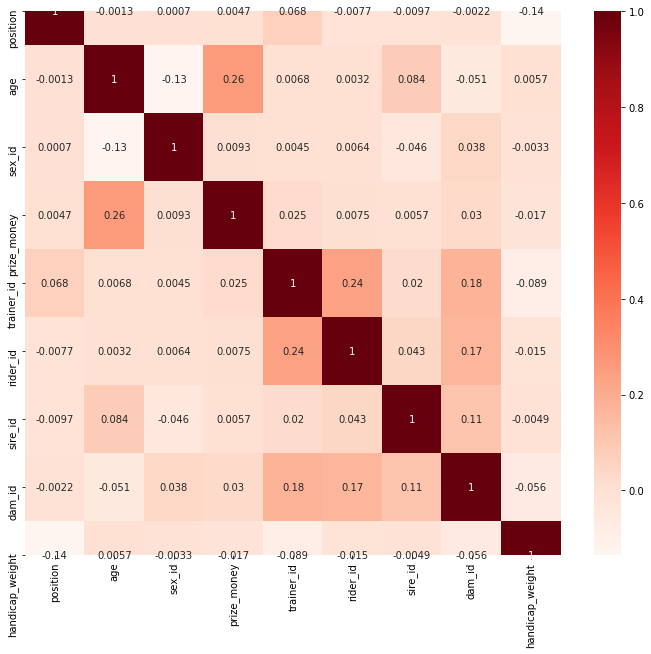

In [41]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = new_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [42]:
X = new_df[['age', 'sex_id', 'prize_money', 'trainer_id', 'rider_id', 'sire_id', 'dam_id', 'handicap_weight']]
y = new_df[["position"]]


In [43]:
print(X.shape, y.shape)

(9592, 8) (9592, 1)


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [45]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [46]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X, y)
rf.score(X, y)

//anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


1.0

In [48]:
feature_names = ['age', 'sex_id', 'prize_money', 'trainer_id', 'rider_id', 'sire_id', 'dam_id', 'handicap_weight']
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.16232834737702623, 'dam_id'),
 (0.1597577354512162, 'sire_id'),
 (0.1593484881863416, 'trainer_id'),
 (0.15559803060671368, 'rider_id'),
 (0.15257362004648717, 'prize_money'),
 (0.0923551339580165, 'handicap_weight'),
 (0.07654270789061221, 'age'),
 (0.04149593648358647, 'sex_id')]

In [49]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train_scaled)

//anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
lab_enc = preprocessing.LabelEncoder()
y_test_encoded = lab_enc.fit_transform(y_test_scaled)

In [51]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train_encoded)
classifier

//anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
#Validate
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train_encoded)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test_encoded)}")

Training Data Score: 0.11036975257158743
Testing Data Score: 0.10133444537114263


In [53]:
#Predict
predictions = classifier.predict(X_test)
print(f"First 10 Predictions: {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].values.tolist()}")

First 10 Predictions: [ 0  0  0  0  0 15  0  0  0  0]
First 10 Actual labels: [[5.0], [3.0], [10.0], [2.0], [7.0], [6.0], [9.0], [1.0], [3.0], [1.0]]


In [54]:
#Reshape
y_r = y_test.values.reshape((2398))

In [55]:
#Dataframe
prediction_df = pd.DataFrame({"Prediction": predictions, "Actual": y_r})
prediction_df

,Prediction,Actual
0,0,5.0
1,0,3.0
2,0,10.0
3,0,2.0
4,0,7.0
...,...,...
2393,15,10.0
2394,15,6.0
2395,0,12.0
2396,4,1.0


//anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


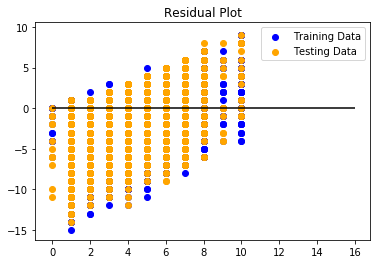

In [56]:
predictions = classifier.predict(X_test_scaled)
classifier.fit(X_train_scaled, y_train_encoded)
plt.scatter(classifier.predict(X_train_scaled), classifier.predict(X_train_scaled) - y_train_encoded, c="blue", label="Training Data")
plt.scatter(classifier.predict(X_test_scaled), classifier.predict(X_test_scaled) - y_test_encoded, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_encoded.min(), xmax=y_test_encoded.max())
plt.title("Residual Plot")
plt.show()